# Atividade Extra 03a
## Reconhecimento de Caracteres


Fonte
http://docs.opencv.org/trunk/d8/d4b/tutorial_py_knn_opencv.html

5000 handwritten digits (500 for each digit). Each digit is a 20x20 image.


(1000, 2000)


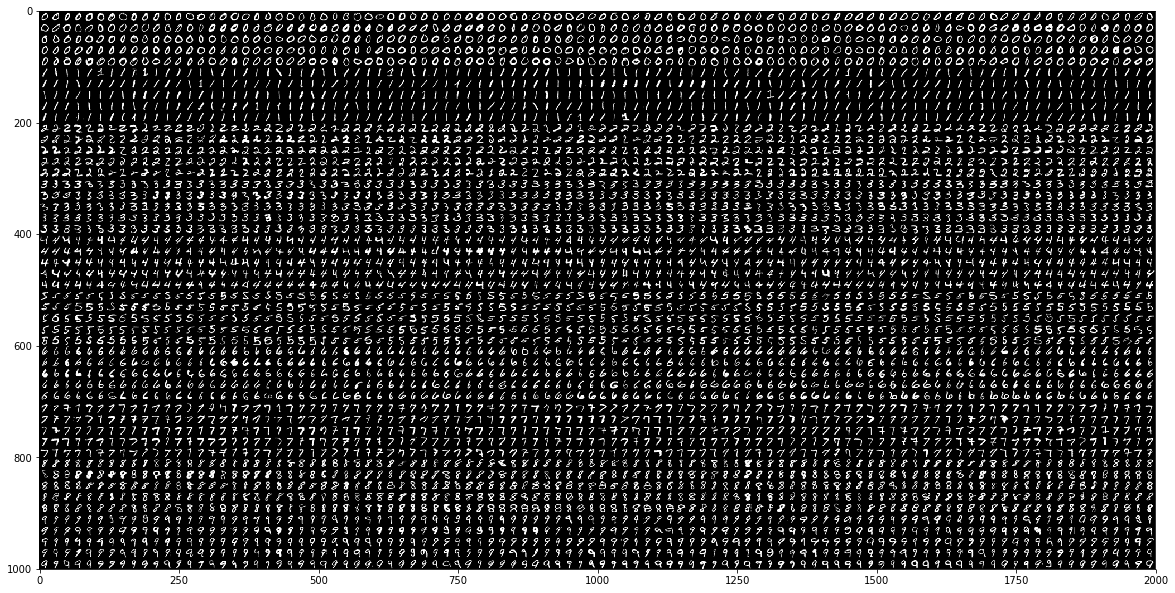

In [6]:
def showfig(image, ucmap):
    imgplot=plt.imshow(image, ucmap)
# comentar esta linha para rodar do shell
get_ipython().magic(u'matplotlib inline')

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('extra03a_digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

print (gray.shape) # tam imagem 1000 x 2000

plt.figure(figsize=(20,20)) # primeiro número
showfig(gray,"gray") 

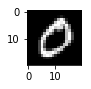

In [21]:
# Agora dividimos a imagem para 5000 células, cada tamanho 20x20
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Converter para array Numpy. Seu tamanho será (50,100,20,20)
x = np.array(cells)

plt.figure(figsize=(1,1)) # primeiro dígito
showfig(x[0,0,:,:],"gray") 
#print (x[0,0,:,:])

In [8]:
# Agora preparamos train_data e test_data.
# de imagem armazenada em matriz 20x20, transforma em img armazenada em vetor  1x400
train = x[:,:50].reshape(-1,400).astype(np.float32)   # Size = (2500,400) até coluna 1000  para ***treinar***
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400) de 1000 até 2000 para ***testar***
 
print (train.shape)
print (train[0,:]) # primeiro dígito 1x400

(2500, 400)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   9.  33.   9.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  41. 177. 249. 178.  29.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  33. 198. 255. 240. 255. 107.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  70. 199. 255. 255.
 197. 154. 253.  98.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  45. 238. 255. 205. 224. 222.  83. 224. 128.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  25. 202. 255. 193.  40.  99.  54.   0.
 190. 197.  16.   0.   0.   0.   0.   0.   0.   0.   0.  20. 163. 246.
 152.  72.   0.   0.   0.   0. 184. 252.  74.   0.   0.   0.   0.   0.
   0.   0.   0.  97. 255. 118.   0.   1.   0.   0.   0.   0. 184.

In [9]:
# Criar rótulos train e test
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

print (train_labels.shape)
print (train_labels[900:905]) # pixels de dígito 3

(2500, 1)
[[3]
 [3]
 [3]
 [3]
 [3]]


In [15]:
# Inicie o kNN, treine os dados e teste-os com dados de teste para k = 1
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=1)

# Agora nós verificamos a precisão da classificação
# Para isso, compare o resultado com test_labels e verifique quais estão errados 
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print (accuracy)

91.76


## OCR para alfabeto (dados já preparados)

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# Carregar os dados, conversores converter a letra para um número
data= np.loadtxt('letter-recognition.data', dtype= 'float32', delimiter = ',',
                    converters= {0: lambda ch: ord(ch)-ord('A')})
# dividir os dados para dois, 10000 cada para treinar e testar
train, test = np.vsplit(data,2)
# split trainData e testData para recursos e respostas
responses, trainData = np.hsplit(train,[1])
labels, testData = np.hsplit(test,[1])
# Inicie o kNN, classifique, meça a precisão.
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, result, neighbours, dist = knn.findNearest(testData, k=5)
correct = np.count_nonzero(result == labels)
accuracy = correct*100.0/10000
print( accuracy )

93.06
